In [1]:
import warnings
warnings.filterwarnings('ignore')

from astropy.table import QTable, join, vstack
import astropy.units as au
import numpy as np
from glob import glob
import os

In [2]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
dendro_dir = '%s/data_hstha_nebulae_catalogue/' %(root_dir)

tables = []
for root, dirs, files in os.walk(dendro_dir):
    for file in files:
        if file.endswith("props_all_cluster.fits"):
            if 'dendro' in root: 
                continue
            print(os.path.join(root, file))
            tables += [QTable.read(os.path.join(root, file))]

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc3627/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc4254/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc1512/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc1433/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc5068/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc4321/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc1365n/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc4303/catalogue/props_all_cluster.fits
/Users/abarnes/Dropbox/work/Sma

In [3]:
# Join tables
table = vstack(tables)

# Order by galaxy names and region IDs from MUSE
gal_name = table['gal_name']
table.remove_column('gal_name')
table.add_column(gal_name, index=0)
table.sort(['gal_name', 'region_ID'])

# # Remove masked values
# mask = table['_idx'].mask
# table_masked = table[~mask]

In [4]:
table.write(dendro_dir+'/all/nebulae_catalogue_wclusters.fits', overwrite=True)

In [5]:
mask = table['gal_name'] == 'NGC4303'
table_masked = table[mask]

for region_ID, reg_id in zip(table_masked['region_ID'], table_masked['reg_id']):
    print(region_ID, reg_id)

14.0 199.0
15.0 1007.0
18.0 1038.0
20.0 118.0
23.0 442.0
25.0 260.0
26.0 1712.0
27.0 1047.0
28.0 55.0
29.0 2034.0
33.0 116.0
34.0 1326.0
35.0 872.0
37.0 1747.0
40.0 920.0
41.0 882.0
44.0 237.0
45.0 167.0
46.0 138.0
48.0 554.0
50.0 250.0
51.0 1959.0
53.0 2430.0
56.0 1084.0
57.0 763.0
58.0 573.0
59.0 1722.0
67.0 2134.0
68.0 1708.0
71.0 451.0
73.0 1025.0
76.0 1478.0
82.0 1228.0
83.0 1770.0
84.0 680.0
85.0 177.0
87.0 2294.0
88.0 1407.0
89.0 2258.0
92.0 995.0
93.0 1787.0
96.0 291.0
97.0 962.0
98.0 1395.0
103.0 1704.0
104.0 1810.0
109.0 1192.0
110.0 2458.0
114.0 1425.0
115.0 7.0
116.0 829.0
118.0 448.0
120.0 2355.0
121.0 2301.0
127.0 2677.0
128.0 1288.0
129.0 648.0
130.0 2055.0
133.0 603.0
147.0 382.0
148.0 2727.0
149.0 809.0
151.0 778.0
154.0 1640.0
155.0 902.0
158.0 771.0
161.0 714.0
162.0 2105.0
163.0 248.0
168.0 1607.0
170.0 741.0
173.0 1200.0
174.0 2221.0
175.0 1431.0
176.0 1272.0
179.0 2663.0
184.0 1345.0
187.0 85.0
188.0 1804.0
189.0 877.0
195.0 887.0
197.0 785.0
203.0 154.0
207.0 104

In [6]:
table

gal_name,region_ID,x_max,y_max,x_com,y_com,ra_max,dec_max,ra_com,dec_com,npix,HA6562_FLUX_HST,HA6562_FLUX_ERR_HST,area_exact,radius_circ,flux_max,flux_min,flux_mean,radius_circ_pc,x_mom,y_mom,ra_mom,dec_mom,area_ellipse,major_sigma,minor_sigma,mean_sigma,position_angle,mean_sigma_pc,complexity_score,flag_edge_hst,flag_touch_hst,cen_x_MUSE,cen_y_MUSE,cen_ra_MUSE,cen_dec_MUSE,cen_x_geo_MUSE,cen_y_geo_MUSE,flag_edge_MUSE,flag_nearby_MUSE,flag_star_MUSE,deproj_dist_MUSE,deproj_phi_MUSE,region_area_MUSE,region_circ_rad_MUSE,HB4861_FLUX_MUSE,OIII5006_FLUX_MUSE,HA6562_FLUX_MUSE,NII6583_FLUX_MUSE,SII6716_FLUX_MUSE,SII6730_FLUX_MUSE,SIII9068_FLUX_MUSE,OI6300_FLUX_MUSE,NII5754_FLUX_MUSE,HEI5875_FLUX_MUSE,SIII6312_FLUX_MUSE,OI6363_FLUX_MUSE,OII7319_FLUX_MUSE,OII7330_FLUX_MUSE,HB4861_FLUX_ERR_MUSE,OIII5006_FLUX_ERR_MUSE,HA6562_FLUX_ERR_MUSE,NII6583_FLUX_ERR_MUSE,SII6716_FLUX_ERR_MUSE,SII6730_FLUX_ERR_MUSE,SIII9068_FLUX_ERR_MUSE,OI6300_FLUX_ERR_MUSE,NII5754_FLUX_ERR_MUSE,HEI5875_FLUX_ERR_MUSE,SIII6312_FLUX_ERR_MUSE,OI6363_FLUX_ERR_MUSE,OII7319_FLUX_ERR_MUSE,OII7330_FLUX_ERR_MUSE,HA6562_SIGMA_MUSE,NII6583_SIGMA_MUSE,OIII5006_SIGMA_MUSE,HA6562_VEL_MUSE,NII6583_VEL_MUSE,OIII5006_VEL_MUSE,HA6562_SIGMA_ERR_MUSE,NII6583_SIGMA_ERR_MUSE,OIII5006_SIGMA_ERR_MUSE,HA6562_VEL_ERR_MUSE,NII6583_VEL_ERR_MUSE,OIII5006_VEL_ERR_MUSE,HB4861_FLUX_CORR_MUSE,OIII5006_FLUX_CORR_MUSE,HA6562_FLUX_CORR_MUSE,NII6583_FLUX_CORR_MUSE,SII6716_FLUX_CORR_MUSE,SII6730_FLUX_CORR_MUSE,SIII9068_FLUX_CORR_MUSE,OI6300_FLUX_CORR_MUSE,NII5754_FLUX_CORR_MUSE,HEI5875_FLUX_CORR_MUSE,SIII6312_FLUX_CORR_MUSE,OI6363_FLUX_CORR_MUSE,OII7319_FLUX_CORR_MUSE,OII7330_FLUX_CORR_MUSE,HB4861_FLUX_CORR_ERR_MUSE,OIII5006_FLUX_CORR_ERR_MUSE,HA6562_FLUX_CORR_ERR_MUSE,NII6583_FLUX_CORR_ERR_MUSE,SII6716_FLUX_CORR_ERR_MUSE,SII6730_FLUX_CORR_ERR_MUSE,SIII9068_FLUX_CORR_ERR_MUSE,OI6300_FLUX_CORR_ERR_MUSE,NII5754_FLUX_CORR_ERR_MUSE,HEI5875_FLUX_CORR_ERR_MUSE,SIII6312_FLUX_CORR_ERR_MUSE,OI6363_FLUX_CORR_ERR_MUSE,OII7319_FLUX_CORR_ERR_MUSE,OII7330_FLUX_CORR_ERR_MUSE,EBV_MUSE,EBV_ERR_MUSE,met_scal_MUSE,met_scal_err_MUSE,logq_D91_MUSE,logq_D91_err_MUSE,t_N2_MUSE,t_S3_MUSE,t_N2_err_MUSE,t_S3_err_MUSE,BPT_NII_MUSE,BPT_SII_MUSE,BPT_OI_MUSE,LOG_SIGMA_SFR_CHAB_MUSE,LOG_SIGMA_STMASS_CHAB_MUSE,5thNN_dist_MUSE,NN_number_MUSE,Environment_MUSE,r_R25_MUSE,r_reff_MUSE,HA6562_LUMINOSITY_MUSE,Delta_met_scal_MUSE,pc_per_pixel_MUSE,EW_HA6562_raw_MUSE,EW_HA6562_raw_ERR_MUSE,EW_HB4861_raw_MUSE,EW_HB4861_raw_ERR_MUSE,EW_HA6562_fit_MUSE,EW_HA6562_fit_ERR_MUSE,EW_HB4861_fit_MUSE,EW_HB4861_fit_ERR_MUSE,EW_HA6562_bgcorr_MUSE,EW_HA6562_bgcorr_ERR_MUSE,EW_HB4861_bgcorr_MUSE,EW_HB4861_bgcorr_ERR_MUSE,HII_class_v2_MUSE,HII_class_v3_MUSE,HA6562_FLUX_CORR_HST,HA6562_FLUX_ERR_CORR_HST,HA6562_LUMINOSITY_HST,HA6562_LUMINOSITY_ERR_HST,region_circ_rad_pc_MUSE,reg_id,reg_x,reg_y,reg_ra,reg_dec,reg_area,reg_rad,NUV_dolflux_mjy,NUV_dolflux_mjy_err,U_dolflux_mjy,U_dolflux_mjy_err,B_dolflux_mjy,B_dolflux_mjy_err,V_dolflux_mjy,V_dolflux_mjy_err,I_dolflux_mjy,I_dolflux_mjy_err,NUV_dolmag_vega,NUV_dolmag_vega_err,U_dolmag_vega,U_dolmag_vega_err,B_dolmag_vega,B_dolmag_vega_err,V_dolmag_vega,V_dolmag_vega_err,I_dolmag_vega,I_dolmag_vega_err,reg_dolflux_Age_MinChiSq,reg_dolflux_Age_MinChiSq_err,reg_dolflux_Mass_MinChiSq,reg_dolflux_Mass_MinChiSq_err,reg_dolflux_Ebv_MinChiSq,reg_dolflux_Ebv_MinChiSq_err,reg_dolflux_ChiSq_Reduced,reg_dolflux_Age_MinChiSq_ave,reg_dolflux_Mass_MinChiSq_sum,multiple_clusters,reg_dolflux_Age_MinChiSq_massweighted
,,pix,pix,pix,pix,deg,deg,deg,deg,pix,erg / (s cm2),erg / (s cm2),arcsec2,arcsec,erg / (s cm2),erg / (s cm2),erg / (s cm2),pc,pix,pix,deg,deg,arcsec2,arcsec,arcsec,arcsec,deg,pc,,,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,pix2,arcsec,1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg /

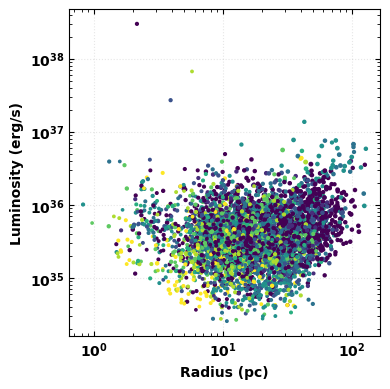

In [7]:
import matplotlib.pyplot as plt
plt.style.use('paper')

table_masked_ = table[table['reg_dolflux_Age_MinChiSq']<10]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.scatter(table_masked_['mean_sigma_pc'], 
            table_masked_['HA6562_LUMINOSITY_HST']/table_masked_['mean_sigma_pc']**2,
            c=table_masked_['reg_dolflux_Age_MinChiSq'],
            s=np.log10(table_masked_['reg_dolflux_Mass_MinChiSq']))

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Radius (pc)')
ax.set_ylabel('Luminosity (erg/s)')
ax.grid(alpha=0.3, linestyle=':')

fig.tight_layout()

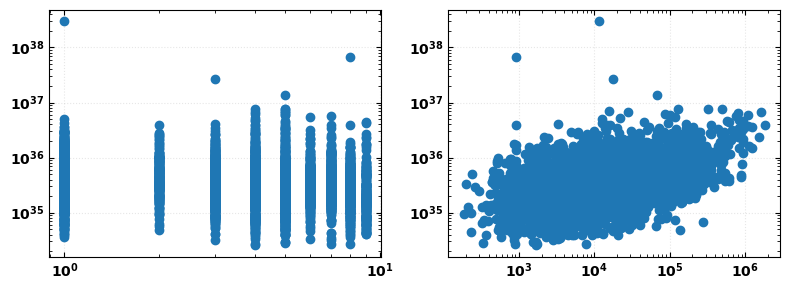

In [8]:
import matplotlib.pyplot as plt
plt.style.use('paper')

table_masked_ = table[table['reg_dolflux_Age_MinChiSq']<10]

fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(table_masked_['reg_dolflux_Age_MinChiSq'], 
            table_masked_['HA6562_LUMINOSITY_HST']/table_masked_['mean_sigma_pc']**2)

ax2.scatter(table_masked_['reg_dolflux_Mass_MinChiSq'], 
            table_masked_['HA6562_LUMINOSITY_HST']/table_masked_['mean_sigma_pc']**2)

for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3, linestyle=':')
    
# ax.set_xlabel('Radius (pc)')
# ax.set_ylabel('Luminosity (erg/s)')

fig.tight_layout()

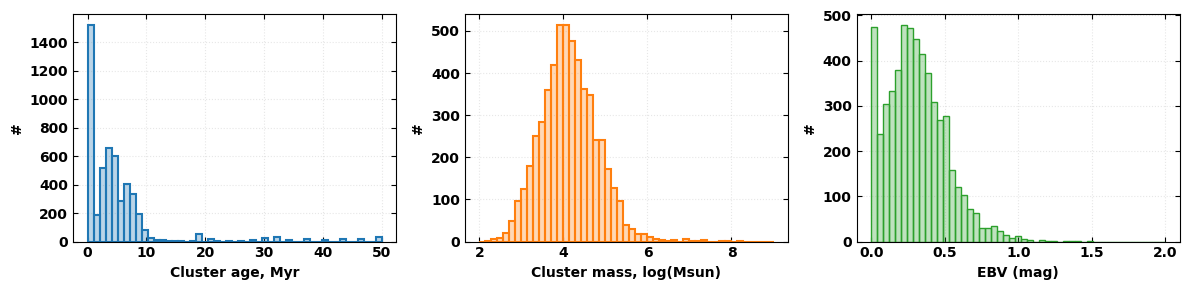

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

bins = np.linspace(0,50,50)
ax1.hist(table['reg_dolflux_Age_MinChiSq'], alpha=0.3, fc='C0', bins=bins)
ax1.hist(table['reg_dolflux_Age_MinChiSq'], fc='none', ec='C0', lw=1.5, bins=bins)
ax1.set_ylabel('#')
ax1.set_xlabel('Cluster age, Myr')
ax1.grid(alpha=0.3, linestyle=':')
# ax1.set_xlim(0,20)

bins = np.linspace(2,9,50)
ax2.hist(np.log10(table['reg_dolflux_Mass_MinChiSq']), alpha=0.3, fc='C1', bins=bins)
ax2.hist(np.log10(table['reg_dolflux_Mass_MinChiSq']), fc='none', ec='C1', lw=1.5, bins=bins)
ax2.set_ylabel('#')
ax2.set_xlabel('Cluster mass, log(Msun)')
ax2.grid(alpha=0.3, linestyle=':')

bins = np.linspace(0,2,50)
ax3.hist(table['reg_dolflux_Ebv_MinChiSq'], alpha=0.3, fc='C2', bins=bins)
ax3.hist(table['reg_dolflux_Ebv_MinChiSq'], fc='none', ec='C2', bins=bins)
ax3.set_ylabel('#')
ax3.set_xlabel('EBV (mag)')
ax3.grid(alpha=0.3, linestyle=':')

fig.tight_layout()